# Networks 1

This code shows you how to use iGraph or Networkx in Python for basic network manipulations:
1. how to create a graph
2. how to create the edge list and adjacency matrix for undirected, directed, weighted and unweighted networks
3. Compute the degree of nodes, the number of nodes and of links

Based on Elsa Arcaute's practical material.

Observations: Networkx is friendlier, igraph has nicer plotting.

In [28]:
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

# igraph

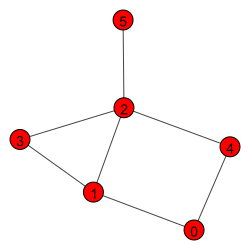

In [2]:
#create example from Newman's book
# We're off to a bad start with igraph when it turn out that if you don't specify a 0 node it creates one for you.
# This is because we're specifying the ids here, and python counts from 0.
# This means you have an orphan node, to avoid we have to start node numbering from 0.
#bad_g1 = ig.Graph([[1,2], [2,3], [2,4], [3,4], [3,5], [1,5], [3,6]], directed = False)

g1 = ig.Graph([[0,1], [1,2], [1,3], [2,3], [2,4], [0,4], [2,5]], directed = False)

# Make some labels for the plot - automatically labels based on the key 'label'
g1.vs["label"] = [v.index for v in g1.vs()]
# plot - NB cairo uses bbox to set figure size in pixels!
ig.plot(g1, bbox =(250,250))

In [3]:
#get name of vertices (nodes)
# again annoyingly you only seem be be able to call a generator, so we have to use a list comprehension
# we call the index property on each vertex in the vertex sequence method vs()
# NB this is how I labelled the graph in the previous step
[v.index for v in g1.vs()]

#NB if we have created labels from the index previously, this also works:
#g1.vs()['label']

[0, 1, 2, 3, 4, 5]

In [4]:
#get edge relations ~ edge list
print g1

IGRAPH U--- 6 7 --
+ attr: label (v)
+ edges:
0--1 1--2 1--3 2--3 2--4 0--4 2--5


In [5]:
# get proper edge list
g1.get_edgelist()

[(0, 1), (1, 2), (1, 3), (2, 3), (2, 4), (0, 4), (2, 5)]

In [6]:
#get adjacency matrix
adj_A1 = g1.get_adjacency()
print adj_A1

[[0, 1, 0, 0, 1, 0]
 [1, 0, 1, 1, 0, 0]
 [0, 1, 0, 1, 1, 1]
 [0, 1, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 0]]


In [7]:
#degree for each node
g1.degree()

[2, 3, 4, 2, 2, 1]

In [8]:
#diameter of network
g1.diameter()

3

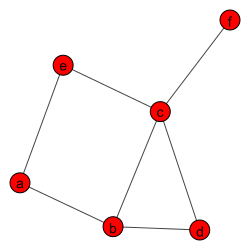

In [9]:
#reproduce same example using letters instead of numbers.
# First make a graph, add vertices as a list of strings. Creates an id and 'name' attribute.
g1n = ig.Graph(directed = False)
g1n.add_vertices(['a','b','c','d','e','f'])
# Now take the edge list and add edges.
el1 = [['a','b'], ['b','c'], ['b','d'], ['c','d'], ['c','e'], ['a','e'], ['c','f']]
g1n.add_edges(el1)

# Set 'label' to vertex 'name'
g1n.vs['label'] = g1n.vs['name']
ig.plot(g1n, bbox =(250,250))

In [10]:
#get the names of the nodes
g1n.vs['name']

['a', 'b', 'c', 'd', 'e', 'f']

In [11]:
#degree for each node
g1n.degree()

[2, 3, 4, 2, 2, 1]

In [12]:
#diameter of network
g1n.diameter()

3

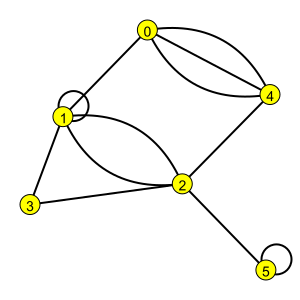

In [13]:
# create network with multiedges and self-edges
g2 = ig.Graph([[0,1],[1,1],[1,2],[1,2],[1,3],[2,3],[2,4],[0,4],[0,4],[4,0],[2,5],[5,5]], directed=False)

#plot graph specifying colours
g2.vs['label'] = [v.index for v in g2.vs()]
ig.plot(g2, vertex_color='yellow', edge_color = 'black', edge_width = 2, margin = 30, bbox = (300,300))

In [14]:
#get name of vertices (nodes)
[v.index for v in g2.vs()]

[0, 1, 2, 3, 4, 5]

In [15]:
#get edge relations ~ edge list
print g2

IGRAPH U--- 6 12 --
+ attr: label (v)
+ edges:
0 -- 1 4 4 4       2 -- 1 1 3 4 5     4 -- 0 0 0 2
1 -- 0 1 1 2 2 3   3 -- 1 2           5 -- 2 5 5


In [16]:
#get proper edge list
g2.get_edgelist()

[(0, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (0, 4),
 (0, 4),
 (0, 4),
 (2, 5),
 (5, 5)]

In [17]:
#get adjacency matrix
adj_A2 = g2.get_adjacency()
print adj_A2

[[0, 1, 0, 0, 3, 0]
 [1, 1, 2, 1, 0, 0]
 [0, 2, 0, 1, 1, 1]
 [0, 1, 1, 0, 0, 0]
 [3, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 1]]


In [18]:
#degree for each node
g2.degree()

[4, 6, 5, 2, 4, 3]

In [19]:
#!!! warning for loops!!!!!!
#The adjacency matrix in iGraph does NOT use a 2 for the self loop, its only for the theoretical computation
#compare the result for degree with k_i=sum_j(A_ij)
#diameter of network
g2.diameter()

3

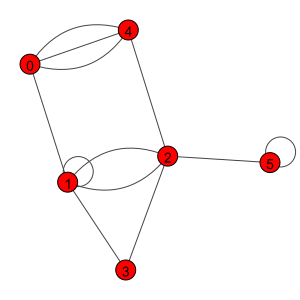

In [20]:
#let us create the network from the adjacency matrix
#construct the matrix first as a list of lists, in which each list is a row.

adj_A = [[0,1,0,0,3,0],
         [1,1,2,1,0,0],
         [0,2,0,1,1,1],
         [0,1,1,0,0,0],
         [3,0,1,0,0,0],
         [0,0,1,0,0,1]]

g3 = ig.Graph.Adjacency(adj_A, mode='undirected')
g3.vs['label'] = [v.index for v in g3.vs()]
ig.plot(g3, margin = 30, bbox = (300,300))

In [21]:
#get name (id) of vertices (nodes)
[v.index for v in g3.vs()]

[0, 1, 2, 3, 4, 5]

In [22]:
#get edge relations ~ edge list
print g3

IGRAPH U--- 6 12 --
+ attr: label (v)
+ edges:
0 -- 1 4 4 4       2 -- 1 1 3 4 5     4 -- 0 0 0 2
1 -- 0 1 1 2 2 3   3 -- 1 2           5 -- 2 5 5


In [23]:
#get proper edge list
g3.get_edgelist()

[(0, 1),
 (0, 4),
 (0, 4),
 (0, 4),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (2, 5),
 (5, 5)]

In [24]:
#get adjacency matrix
adj_A3 = g3.get_adjacency()
print adj_A3

[[0, 1, 0, 0, 3, 0]
 [1, 1, 2, 1, 0, 0]
 [0, 2, 0, 1, 1, 1]
 [0, 1, 1, 0, 0, 0]
 [3, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 1]]


In [25]:
#degree for each node
g3.degree()

[4, 6, 5, 2, 4, 3]

In [26]:
#see that if set 2 for loops will get wrong degree
#diameter of network
g3.diameter()

3

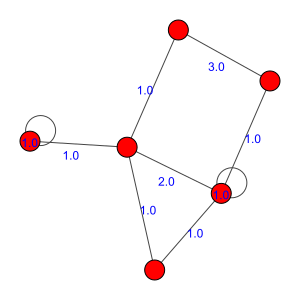

In [30]:
# use same adjacency matrix to create a weighted graph
g4 = ig.Graph.Weighted_Adjacency(adj_A, mode='undirected')

# Add edge weights as blue edge labels.
ig.plot(g4, edge_label= g4.es['weight'], edge_label_color="blue", margin = 30, bbox = (300,300))

In [31]:
#get name of vertices (nodes)
[v.index for v in g4.vs()]

[0, 1, 2, 3, 4, 5]

In [32]:
#get edge relations ~ edge list
print g4

IGRAPH U-W- 6 9 --
+ attr: weight (e)
+ edges:
0--1 0--4 1--1 1--2 1--3 2--3 2--4 2--5 5--5


In [33]:
#get proper edge list
g4.get_edgelist()

[(0, 1), (0, 4), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (5, 5)]

In [34]:
#get adjacency matrix
adj_A4= g4.get_adjacency(attribute='weight')
print adj_A4

[[0, 1.0, 0, 0, 3.0, 0]
 [1.0, 1.0, 2.0, 1.0, 0, 0]
 [0, 2.0, 0, 1.0, 1.0, 1.0]
 [0, 1.0, 1.0, 0, 0, 0]
 [3.0, 0, 1.0, 0, 0, 0]
 [0, 0, 1.0, 0, 0, 1.0]]


In [35]:
#need to put attr='weight' to see the weights and not just the topological structure in the adjacency matrix
#!!!! degree for each node when network is weighted needs a different function!!!!!
g4.degree() 

[2, 5, 4, 2, 2, 3]

In [36]:
#this gives the wrong degree. 
#It gives the total number of links going in and out a node. Therefore a loop counts as 2
#If we want to consider the weight of a link into the degree, we need to use "strength"
g4.strength(weights='weight')

[4.0, 6.0, 5.0, 2.0, 4.0, 3.0]

In [37]:
#Note that in addition to the weight, loops are counted as 2
#diameter of network: !!!! unweighted unless weights specified
g4.diameter(weights='weight')

4.0

In [38]:
#topological diameter
g4.diameter()

3

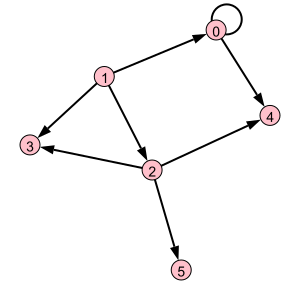

In [39]:
# construct a directed network
g_dir = ig.Graph([[0,0],[1,0],[1,2],[1,3],[2,3],[2,4],[0,4],[2,5]] , directed=True)

# plot directed graph
g_dir.vs['label'] = [v.index for v in g_dir.vs()]
ig.plot(g_dir,edge_color="black", vertex_color="pink", edge_width=2, margin = 30, bbox = (300,300))

In [40]:
#get proper edge list
g_dir.get_edgelist()

[(0, 0), (1, 0), (1, 2), (1, 3), (2, 3), (2, 4), (0, 4), (2, 5)]

In [41]:
#get adjacency matrix
adj_Adir = g_dir.get_adjacency()
print adj_Adir

[[1, 0, 0, 0, 1, 0]
 [1, 0, 1, 1, 0, 0]
 [0, 0, 0, 1, 1, 1]
 [0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0]]


In [42]:
#!!!!! Note that in iGraph A_ij=1 if there's a link from i to j instead of from j to i as in Newman's book
#in degrees
g_dir.degree(mode = 'in') 

[2, 0, 1, 2, 2, 1]

In [43]:
#out degrees
g_dir.degree(mode = 'out') 

[2, 3, 3, 0, 0, 0]

In [44]:
#diameter of network: !!! take directed network as defined unless specified
g_dir.diameter()

2

In [45]:
#diameter of undirected network
g_dir.diameter(directed=False)

3

# Networkx

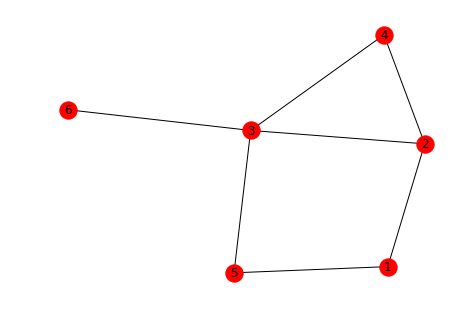

In [49]:
#create example from Newman's book
g1 = nx.Graph([[1,2], [2,3], [2,4], [3,4], [3,5], [1,5], [3,6]])
nx.draw(g1, with_labels = True)

In [50]:
#get name of vertices (nodes)
g1.nodes()

[1, 2, 3, 4, 5, 6]

In [51]:
#get edge list
g1.edges()

[(1, 2), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)]

In [52]:
#get adjacency matrix
adj_A1 = nx.adjacency_matrix(g1)
print adj_A1.todense()

[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


In [53]:
#degree for each node
g1.degree()

{1: 2, 2: 3, 3: 4, 4: 2, 5: 2, 6: 1}

In [54]:
#diameter of network
nx.diameter(g1)

3

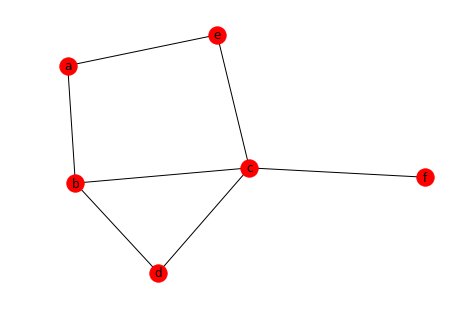

In [56]:
#reproduce same example using letters instead of numbers
el1 = [['a','b'], ['b','c'], ['b','d'], ['c','d'], ['c','e'], ['a','e'], ['c','f']]
g1n = nx.Graph(el1)
nx.draw(g1n, with_labels = True)

In [57]:
#get name of nodes
g1n.nodes()

['a', 'c', 'b', 'e', 'd', 'f']

In [58]:
#degree for each node
g1n.degree()

{'a': 2, 'b': 3, 'c': 4, 'd': 2, 'e': 2, 'f': 1}

In [59]:
nx.diameter(g1n)

3

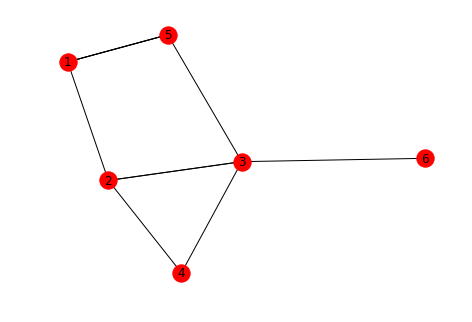

In [61]:
# create network with multiedges and self-edges
g2 = nx.MultiGraph([[1,2], [2,2], [2,3], [2,3], [2,4], [3,4], [3,5], [1,5], [1,5], [5,1], [3,6], [6,6]])
nx.draw(g2, with_labels = True)

In [62]:
#get name of vertices (nodes)
g2.nodes()

[1, 2, 3, 4, 5, 6]

In [63]:
#get edge list
g2.edges()

[(1, 2),
 (1, 5),
 (1, 5),
 (1, 5),
 (2, 2),
 (2, 3),
 (2, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (6, 6)]

In [64]:
#get adjacency matrix
adj_A2 = nx.adjacency_matrix(g2)
print adj_A2.todense()

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [65]:
#degree for each node
g2.degree()

{1: 4, 2: 6, 3: 5, 4: 2, 5: 4, 6: 3}

In [66]:
#!!! warning for loops!!!!!!
#The adjacency matrix in networkx does NOT need a 2 for the loop only for the theoretical computation
#compare the result for degree with k_i=sum_j(A_ij)
#diameter of network
nx.diameter(g2)

3

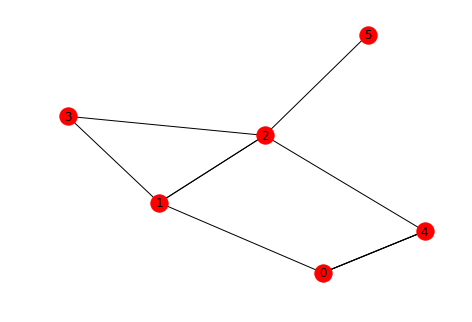

In [82]:
#let us create the network from the adjacency matrix
#construct the matrix first as a list of lists, in which each list is a row.

adj_A = [[0,1,0,0,3,0],
         [1,1,2,1,0,0],
         [0,2,0,1,1,1],
         [0,1,1,0,0,0],
         [3,0,1,0,0,0],
         [0,0,1,0,0,1]]

# NB without specifically assigning names Python numbers from 0.
g3 = nx.from_numpy_matrix(np.array(adj_A),parallel_edges=True, create_using=nx.MultiGraph())
nx.draw(g3, with_labels=True)

In [83]:
#get name of vertices (nodes)
g3.nodes()

[0, 1, 2, 3, 4, 5]

In [84]:
#get edge list - note 0 starting id
g3.edges()

[(0, 1),
 (0, 4),
 (0, 4),
 (0, 4),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (2, 5),
 (5, 5)]

In [85]:
#get adjacency matrix
adj_A3 = nx.adjacency_matrix(g3)
print adj_A3.todense()

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [86]:
#degree for each node
g3.degree()

{0: 4, 1: 6, 2: 5, 3: 2, 4: 4, 5: 3}

In [87]:
#see that if set 2 for loops will get wrong degree
#diameter of network
nx.diameter(g3)

3

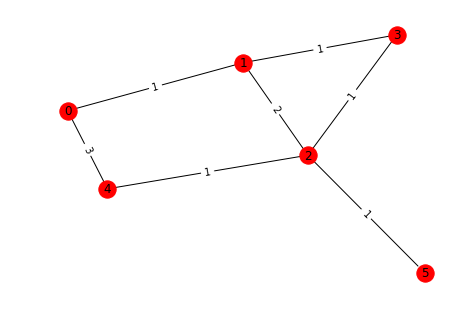

In [95]:
# use same adjacency matrix to create a weighted graph - note this is a default, no extra parameters needed.
g4 = nx.from_numpy_matrix(np.array(adj_A))

pos = nx.spring_layout(g4)
nx.draw(g4, with_labels=True, pos=pos)
nx.draw_networkx_edge_labels(g4, edge_labels = nx.get_edge_attributes(g4,'weight'), pos= pos);

In [96]:
#get name of vertices (nodes)
g4.nodes()

[0, 1, 2, 3, 4, 5]

In [97]:
#get edge list
g4.edges()

[(0, 1), (0, 4), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (5, 5)]

In [98]:
#get adjacency matrix
adj_A4 = nx.adjacency_matrix(g4)
print adj_A4.todense()

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [99]:
#get node degrees - basic command is wrong as it doesn't consider weights.
g4.degree()

{0: 2, 1: 5, 2: 4, 3: 2, 4: 2, 5: 3}

In [100]:
#get 'strength' (NB not called strength in Networkx, just specify weight in degree)
g4.degree(weight='weight')

{0: 4, 1: 6, 2: 5, 3: 2, 4: 4, 5: 3}

In [101]:
#get diameter - note this is just the topological diameter
nx.diameter(g4)

3

In [136]:
# getting weighted diameter requires eccentricity, which we use to calculate the weighted shortest paths.
e = nx.eccentricity(g4, sp = nx.shortest_path_length(g4,weight='weight'))
nx.diameter(g4,e)

4

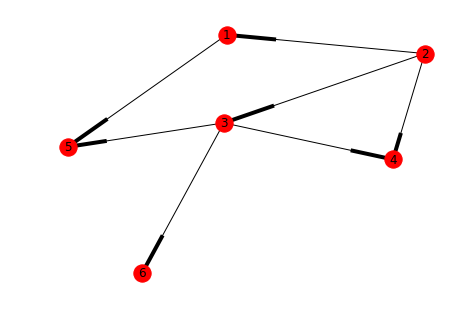

In [138]:
#construct a directed network
g_dir = nx.DiGraph([[1,1], [2,1], [2,3], [2,4], [3,4], [3,5], [1,5], [3,6]])
# NB arrow heads are the thicker lines...
nx.draw(g_dir, with_labels=True)

In [139]:
#get edge list
g_dir.edges()

[(1, 1), (1, 5), (2, 1), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)]

In [140]:
#get adjacency matrix
adj_Adir = nx.adjacency_matrix(g_dir)
print adj_Adir.todense()

[[1 0 0 0 1 0]
 [1 0 1 1 0 0]
 [0 0 0 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [144]:
#!!!!! Note that in networkx A_ij=1 if there's a link from i to j instead of from j to i as in Newman's book
#in degrees
g_dir.in_degree()

{1: 2, 2: 0, 3: 1, 4: 2, 5: 2, 6: 1}

In [145]:
#out degree
g_dir.out_degree()

{1: 2, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0}

In [152]:
#diameter of network: !!! networkx can only find the shortest paths in undirected graphs
nx.diameter(g_dir.to_undirected())

3